In [1]:
import pandas as pd
df = pd.read_excel('산업안전보건법.xlsx')
posts = df.get('조내용')

In [2]:
from konlpy.tag import Mecab
tagger = Mecab()

stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
stop_words = stop_words.split(' ')
stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [3]:
nouns = []
for post in posts:
    for noun in tagger.nouns(post):
        if noun not in stop_words:
            nouns.append(noun)
            
nouns[0:10]

['조', '목적', '법', '산업', '안전', '보건', '기준', '확립', '책임', '소재']

In [4]:
from collections import Counter
num_top_nouns = 30
nouns_counter = Counter(nouns)
top_nouns = dict(nouns_counter.most_common(num_top_nouns))
top_nouns

{'항': 2290,
 '조제': 1533,
 '안전': 1016,
 '경우': 907,
 '조': 740,
 '보건': 671,
 '고용': 571,
 '자제': 446,
 '물질': 420,
 '호': 398,
 '위반': 382,
 '근로자': 353,
 '해당': 353,
 '사항': 347,
 '작업': 342,
 '기관': 320,
 '노동': 302,
 '부령': 301,
 '장관': 262,
 '노동부': 261,
 '밖': 255,
 '자료': 255,
 '필요': 242,
 '업무': 241,
 '유해': 239,
 '사업주': 229,
 '건강': 219,
 '포함': 211,
 '조사': 193,
 '진단': 191}

In [5]:
!pip install wordcloud

In [6]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_nouns)

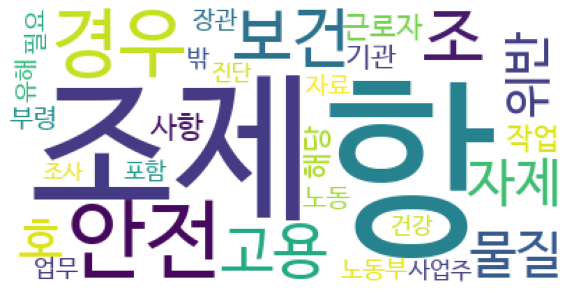

In [7]:
# 많이 나타나는 단어일수록 크게 나타남
import matplotlib.pyplot as plt
figure = plt.figure()
figure.set_size_inches(10, 10)
ax = figure.add_subplot(1, 1, 1)
ax.axis("off")
ax.imshow(wc)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidv = TfidfVectorizer().fit(top_nouns)
tfidv.transform(posts).toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.5547002 , 0.        , ..., 0.        , 0.        ,
        0.83205029],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.80178373]])

In [9]:
pd.DataFframe(tfidv.transform(posts).toarray())

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0000,0.0,0.632456,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.316228,0.0,0.000000,0.0,0.0,0.0,0.0,0.316228
2,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.442326,0.0,...,0.000000,0.0,0.000000,0.0,0.147442,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0000,0.0,0.235702,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000
173,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
174,0.0,0.5547,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.832050
175,0.0,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
